## imports

In [1]:
import random
# from bloodtype import BloodType

from tqdm import tqdm, trange

import ipdb
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('log_df.csv', header=0, index_col=False)
df.columns

Index(['time', 'population_size', 'deaths', 'births', 'sex_f', 'sex_m',
       'bt_pt-O', 'bt_pt-A', 'bt_pt-B', 'bt_pt-AB', 'btrf_pt-O+', 'btrf_pt-A+',
       'btrf_pt-B+', 'btrf_pt-AB+', 'btrf_pt-O-', 'btrf_pt-A-', 'btrf_pt-B-',
       'btrf_pt-AB-', '[0.0-10.0)', '[10.0-20.0)', '[20.0-30.0)',
       '[30.0-40.0)', '[40.0-50.0)', '[50.0-60.0)', '[60.0-70.0)',
       '[70.0-80.0)', '[80.0-90.0)', '[90.0-100.0)', '[100.0)'],
      dtype='object')

In [3]:
bt_pt = ['bt_pt-O','bt_pt-A', 'bt_pt-B', 'bt_pt-AB']
df_bt = df[bt_pt].divide(np.sum(df[bt_pt], axis=1),axis='rows')

df_bt.to_csv('bt_df.csv')


In [4]:
btrf_pt = ['btrf_pt-O+', 'btrf_pt-A+','btrf_pt-B+', 'btrf_pt-AB+', 'btrf_pt-O-', 'btrf_pt-A-', 'btrf_pt-B-', 'btrf_pt-AB-']
df_btrf = df[btrf_pt].divide(np.sum(df[btrf_pt], axis=1),axis='rows')

df_btrf.to_csv('btrf_df.csv')


In [5]:
default_colors = ['#1f77b4',
                  '#ff7f0e',
                  '#2ca02c',
                  '#d62728',
                  '#9467bd',
                  '#8c564b',
                  '#e377c2',
                  '#7f7f7f',
                  '#bcbd22',
                  '#17becf',
                  '#1a55FF']

bt_pt_colors = {
    'bt_pt-O': default_colors[0],
    'bt_pt-A': default_colors[1],
    'bt_pt-B': default_colors[2],
    'bt_pt-AB': default_colors[3]
}

btrf_pt_colors = {
    'btrf_pt-O+': default_colors[0],
    'btrf_pt-A+': default_colors[1],
    'btrf_pt-B+': default_colors[2],
    'btrf_pt-AB+': default_colors[3],
    'btrf_pt-O-': default_colors[4],
    'btrf_pt-A-': default_colors[5],
    'btrf_pt-B-': default_colors[6],
    'btrf_pt-AB-': default_colors[7],
}

bt_pt_short = {
    'bt_pt-O': 'O',
    'bt_pt-A': 'A',
    'bt_pt-B': 'B',
    'bt_pt-AB': 'AB'
}

btrf_pt_short = {
    'btrf_pt-O+': 'O+',
    'btrf_pt-A+': 'A+',
    'btrf_pt-B+': 'B+',
    'btrf_pt-AB+': 'AB+',
    'btrf_pt-O-': 'O-',
    'btrf_pt-A-': 'A-',
    'btrf_pt-B-': 'B-',
    'btrf_pt-AB-': 'AB-',
}

age_groups = ['[0.0-10.0)', '[10.0-20.0)', '[20.0-30.0)', '[30.0-40.0)', 
              '[40.0-50.0)', '[50.0-60.0)', '[60.0-70.0)', '[70.0-80.0)', 
              '[80.0-90.0)', '[90.0-100.0)', '[100.0)']

In [6]:
df.columns

Index(['time', 'population_size', 'deaths', 'births', 'sex_f', 'sex_m',
       'bt_pt-O', 'bt_pt-A', 'bt_pt-B', 'bt_pt-AB', 'btrf_pt-O+', 'btrf_pt-A+',
       'btrf_pt-B+', 'btrf_pt-AB+', 'btrf_pt-O-', 'btrf_pt-A-', 'btrf_pt-B-',
       'btrf_pt-AB-', '[0.0-10.0)', '[10.0-20.0)', '[20.0-30.0)',
       '[30.0-40.0)', '[40.0-50.0)', '[50.0-60.0)', '[60.0-70.0)',
       '[70.0-80.0)', '[80.0-90.0)', '[90.0-100.0)', '[100.0)'],
      dtype='object')

In [7]:
def plot_size(df, save=False):
    
    x = df['time']
    y = df['population_size']
    d = df['deaths']
    b = df['births']

    fig, ax = plt.subplots(figsize=(7,5))
    fig.subplots_adjust(right=0.75)


    twin1 = ax.twinx()
    twin2 = ax.twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines.right.set_position(("axes", 1.2))

    p1, = ax.plot(x, y, default_colors[0], label="population size")
    p2, = twin1.plot(x, b, default_colors[1], label="births")
    p3, = twin2.plot(x, d, default_colors[2], label="deaths")

    # ax.set_xlim(0, 2)
    # ax.set_ylim(0, 2)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax.set_xlabel("year")
    ax.set_ylabel("population size")
    twin1.set_ylabel("births")
    twin2.set_ylabel("deaths")

    ax.yaxis.label.set_color(p1.get_color())
    twin1.yaxis.label.set_color(p2.get_color())
    twin2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=0.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    # ax.legend(handles=[p1, p2, p3])

    # plt.legend()
    plt.xlabel("years")
    plt.tight_layout()

    if save:
        plt.savefig("./populationsize.png")
        plt.close()
    else:
        plt.show()


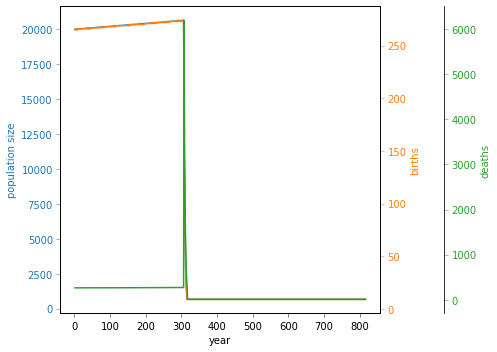

In [8]:
plot_size(df, save=True)
plot_size(df)

In [9]:
def plot_bt_pt(df, showRf=False, ratio=False, save=False):
    x = df['time']
    if showRf:
        y = df[btrf_pt]
    else:
        y = df[bt_pt]
    
    fig, ax = plt.subplots(figsize=(7,5))
    fig.set_dpi(200.0)
    if ratio:
        y = np.cumsum(y, axis=1)
        
        if showRf:
            y = (y.T / y[btrf_pt[-1]]).T
            for i in reversed(range(len(btrf_pt))):
                p = btrf_pt[i]
                # ax.plot(X, Y[:, i], color=self.bt_pt_colors[p], alpha=1.00, label=p, linewidth=0.1)
                ax.fill_between(x,
                                y[p],
                                np.zeros(
                                    y[btrf_pt[0]].shape) if i == 0 else y[btrf_pt[i-1]],
                                color=btrf_pt_colors[p],
                                alpha=1,
                                label=btrf_pt_short[p]
                                )
            plt.ylabel("ratio of population size per blood type \nand rhesus factor")
        else:
            y = (y.T / y[bt_pt[-1]]).T
            for i in reversed(range(len(bt_pt))):
                p = bt_pt[i]
                # ax.plot(X, Y[:, i], color=self.bt_pt_colors[p], alpha=1.00, label=p, linewidth=0.1)
                ax.fill_between(x,
                                y[p],
                                np.zeros(
                                    y[bt_pt[0]].shape) if i == 0 else y[bt_pt[i-1]],
                                color=bt_pt_colors[p],
                                alpha=1,
                                label=bt_pt_short[p]
                                )
                plt.ylabel("ratio of population size per blood type")
        plt.legend()
        plt.xlabel("years")
        plt.tight_layout()
    
    else:
        if showRf:
            for p in btrf_pt:
                ax.plot(x, y[p], color=btrf_pt_colors[p], label=btrf_pt_short[p])
            plt.ylabel("population size per blood type and rhesus factor")
        else:
            for p in bt_pt:
                ax.plot(x, y[p], color=bt_pt_colors[p], label=bt_pt_short[p])
            plt.ylabel("population size per blood type")
        plt.legend()
        plt.grid(linestyle='--', alpha=0.7)
        plt.xlabel("years")
        plt.tight_layout()

    if save:
        plt.savefig("./bloodtype{}{}.png".format('_rf' if showRf else '',
                                                    '_ratio' if ratio else ''))
        plt.close()
    else:
        plt.show()

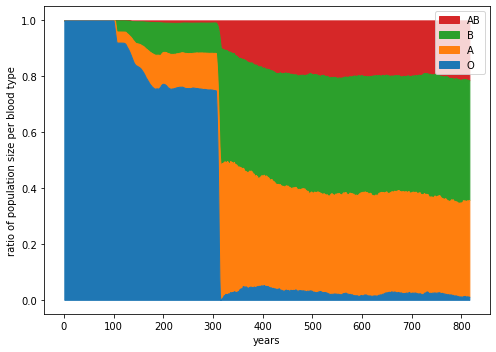

In [10]:
plt.rc('font', size=14)
plot_bt_pt(df, ratio=False, showRf=False, save=True)
plot_bt_pt(df, ratio=True, showRf=False, save=True)
plot_bt_pt(df, ratio=False, showRf=True, save=True)
plot_bt_pt(df, ratio=True, showRf=True, save=True)
plot_bt_pt(df, ratio=True, showRf=False)

In [11]:

def plot_sex(df, ratio=False, save=False):
    x = df['time']
    y = df[['sex_f', 'sex_m']]
    if ratio:
        y = np.cumsum(y, axis=1)
        y = (y.T / y['sex_m']).T

    fig, ax = plt.subplots(figsize=(7,5))
    if ratio:
        ax.fill_between(x, y['sex_m'], y['sex_f'],
                        color=default_colors[0], alpha=1, label='m')
        ax.fill_between(x, y['sex_f'], np.zeros(y['sex_f'].shape),
                        color=default_colors[1], alpha=1, label='f')
        plt.ylabel("ratio of sexs")
    else:
        ax.plot(x, y['sex_m'], color=default_colors[0], label='m')
        ax.plot(x, y['sex_f'], color=default_colors[1], label='f')
        plt.grid(linestyle='--', alpha=0.7)
        plt.ylabel("sex")

    plt.legend()
    plt.xlabel("years")
    
    plt.tight_layout()

    if save:
        plt.savefig("./sex_distribution{}.png".format('_ratio' if ratio else ''))
        plt.close()
    else:
        plt.show()


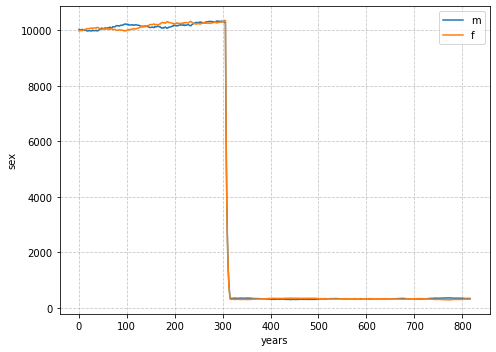

In [12]:
plot_sex(df, ratio=False, save=True)
plot_sex(df, ratio=True, save=True)
plot_sex(df, ratio=False)

In [13]:
def plot_age_groups(df, ratio=False, save=False):
    x = df['time']

    y = df[age_groups]
    


    if ratio:
        y = np.cumsum(y, axis=1)
        y = (y.T / y[age_groups[-1]]).T

    fig, ax = plt.subplots(figsize=(7,5))


    if ratio:
        for i in reversed(range(len(age_groups))):
            age_group = age_groups[i]
            if age_group == age_groups[-1]:
                age_group_label = age_group[1:-3]+r'-$\infty$'
            else:
                age_group_label = '-'.join([i[:-2] for i in age_group[1:-1].split('-')])
            ax.fill_between(x,
                            y[age_group],
                            np.zeros(y[age_group].shape) if i == 0 else y[age_groups[i-1]],
                            color=default_colors[i],
                            alpha=1,
                            label=age_group_label
                            )
            plt.ylabel("ratio of population size per age group")
    else:
        for i in reversed(range(len(age_groups))):
            age_group = age_groups[i]
            if age_group == age_groups[-1]:
                age_group_label = age_group[1:-3]+r'-$\infty$'
            else:
                age_group_label = '-'.join([i[:-2] for i in age_group[1:-1].split('-')])
            ax.plot(x,y[age_group], color=default_colors[i], label=age_group_label)

            plt.ylabel("population size per age group")
            plt.grid(linestyle='--', alpha=0.7)
    
    plt.legend()
    plt.xlabel("years")
    
    plt.tight_layout()

    if save:
        plt.savefig("./age_distribution{}.png".format('_ratio' if ratio else ''))
        plt.close()
    else:
        plt.show()

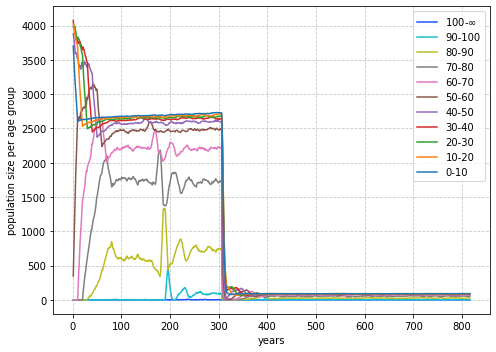

In [14]:

plot_age_groups(df, ratio=False, save=True)
plot_age_groups(df, ratio=True, save=True)
plot_age_groups(df, ratio=False, save=False)